# Regressão linear multivariada

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import linear_regression_models as lin
import common as com

data_table = pd.DataFrame({'Salário': [1500, 2000, 3000, 3300, 4200, 5500],
                           'Dívida': [0, 4000, 2000, 1500, 1000, 1700],
                           'Crédito': [16500, 18000, 28000, 33000, 49000, 52000]},
                   dtype='float')

display(data_table)
x = data_table.drop('Crédito', axis=1).values
y = data_table['Crédito'].values

,Salário,Dívida,Crédito
0,1500.0,0.0,16500.0
1,2000.0,4000.0,18000.0
2,3000.0,2000.0,28000.0
3,3300.0,1500.0,33000.0
4,4200.0,1000.0,49000.0
5,5500.0,1700.0,52000.0


## Normalização dos dados

In [2]:
normalize_data = True

if normalize_data:
    x_original = x.copy()
    y_original = y.copy()
    
    x = com.normalize_data(x, ignore_first=False)['data']
    y = com.normalize_data(y, ignore_first=False)['data']

## Solução iterativa via gradiente descendente

In [3]:
model_gd = lin.gd(x=x, y=y, num_epochs=100*x.shape[0], alpha=10**-2) 
w_gd = model_gd['w']    
mse_history_gd = model_gd['mse_history']
mse_gd = mse_history_gd[-1]

print("MSE obtido via GD: %.3e" % mse_gd)
print("Parâmetros obtidos via GD:\n%s" % w_gd)

MSE obtido via GD: 4.360e-02
Parâmetros obtidos via GD:
[ 5.57424477e-17  9.58859135e-01 -1.27400193e-01]


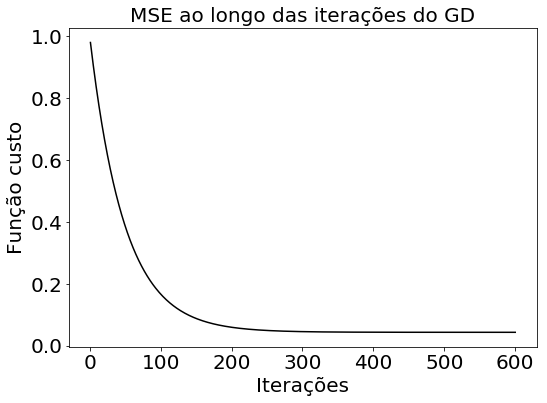

In [4]:
com.plot_loss_path(mse_history_gd, 'MSE ao longo das iterações do GD')

## Solução iterativa via gradiente descendente estocástico (LMS)

In [5]:
model_lms = lin.lms(x=x, y=y, num_epochs=100, alpha=10**-2) 
w_lms = model_lms['w']    
mse_history_lms = model_lms['mse_history']
mse_lms = mse_history_lms[-1]

print("MSE obtido via LMS: %.3e" % mse_lms)
print("Parâmetros obtidos via LMS:\n%s" % w_lms)

MSE obtido via LMS: 4.360e-02
Parâmetros obtidos via LMS:
[-3.69885107e-04  9.58477021e-01 -1.26704374e-01]


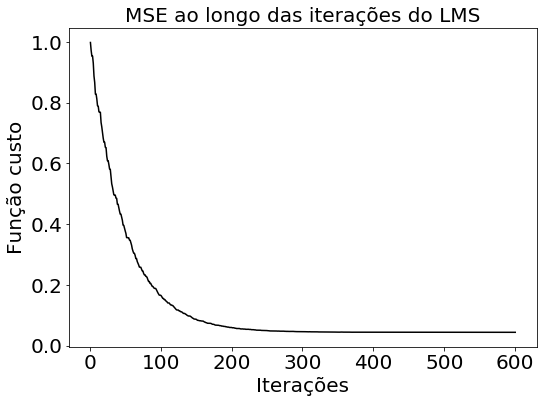

In [6]:
com.plot_loss_path(mse_history_lms, 'MSE ao longo das iterações do LMS')

## Solução em batch via OLS

In [7]:
model_ols = lin.ols(x, y)
w_ols = model_ols['w']
mse_ols = model_ols['mse']

print("MSE obtido via OLS: %.3e" % mse_ols)
print("Parâmetros obtidos via OLS:\n%s" % w_ols)

MSE obtido via OLS: 4.360e-02
Parâmetros obtidos via OLS:
[-2.08166817e-17  9.61237076e-01 -1.26764070e-01]


In [8]:
print("MSE obtido via GD: %.3e" % mse_gd)
print("Parâmetros obtidos via GD:\n%s\n" % w_gd)

print("MSE obtido via LMS: %.3e" % mse_lms)
print("Parâmetros obtidos via LMS:\n%s\n" % w_lms)

print("MSE obtido via OLS: %.3e" % mse_ols)
print("Parâmetros obtidos via OLS:\n%s\n" % w_ols)

MSE obtido via GD: 4.360e-02
Parâmetros obtidos via GD:
[ 5.57424477e-17  9.58859135e-01 -1.27400193e-01]

MSE obtido via LMS: 4.360e-02
Parâmetros obtidos via LMS:
[-3.69885107e-04  9.58477021e-01 -1.26704374e-01]

MSE obtido via OLS: 4.360e-02
Parâmetros obtidos via OLS:
[-2.08166817e-17  9.61237076e-01 -1.26764070e-01]

